In [1]:
## Based on
#  - https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
#  - https://towardsdatascience.com/an-ultimate-guide-to-time-series-analysis-in-pandas-76a0433621f3

In [2]:
# Imports
import pandas as pd

In [3]:
# Read data and parse data
data = pd.read_csv('data/solar.csv', parse_dates=['Date'], index_col='Date')
data.shape

(4383, 4)

In [4]:
# Sample
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
# Data stats
data.info()
## Note: data has missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [6]:
# Separating date components
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday'] = data.index.dayofweek

In [7]:
data.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [8]:
# Looking for days of a particular range
data.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [9]:
# And month
data.loc['2016-9'].describe()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.000000
mean,1334.100667,140.743833,128.280933,269.024767,2016.0,9.0,3.033333
std,130.261933,116.777229,37.231172,115.643769,0.0,0.0,1.973677
min,1074.470000,24.112000,49.467000,103.380000,2016.0,9.0,0.000000
25%,1230.262250,64.606750,99.867000,212.913750,2016.0,9.0,1.250000
50%,1397.956000,98.160500,141.588500,242.435000,2016.0,9.0,3.000000
75%,1410.332000,180.766500,158.744500,306.605250,2016.0,9.0,4.750000
max,1446.824000,514.517000,178.620000,641.706000,2016.0,9.0,6.000000


In [10]:
# Display figures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Use seaborn style defaults; set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

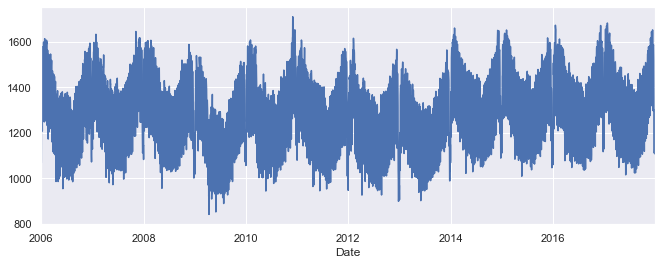

In [11]:
# Just consumption
data['Consumption'].plot();

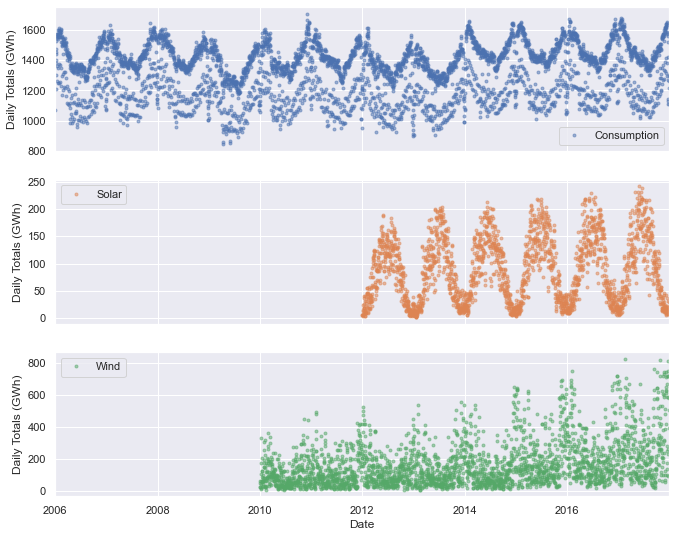

In [12]:
# Multiple information
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

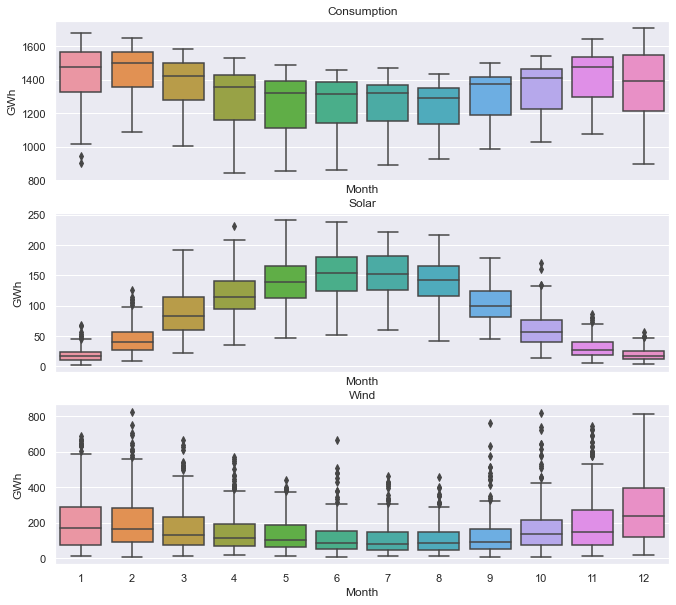

In [13]:
# Box plot to show seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

# Cleaning up x-axis
if ax != axes[-1]:
    ax.set_xlabel('')


Text(0, 0.5, 'Daily Consumption (GWh)')

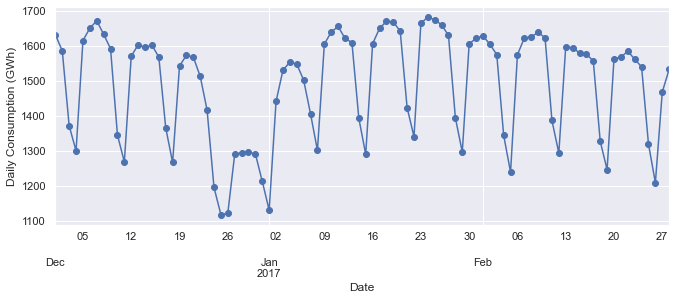

In [14]:
# Look deeply at a time range
ax = data.loc['2016-12':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

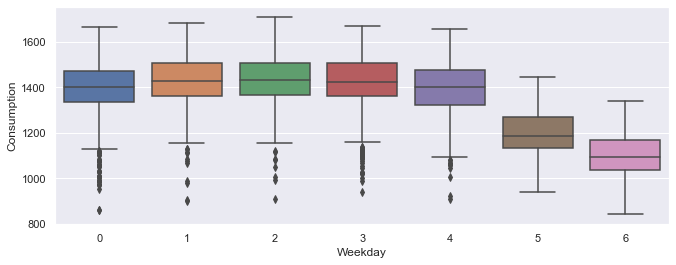

In [15]:
sns.boxplot(data=data, x='Weekday', y='Consumption');

In [16]:
## Sampling to a different scale
# Resample to weekly
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


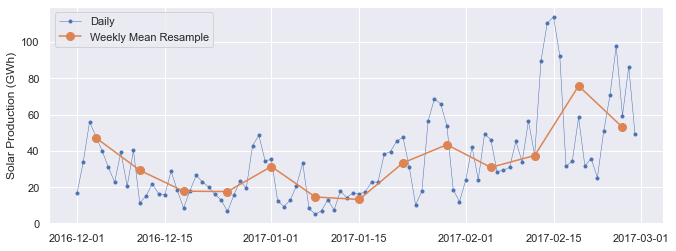

In [18]:
# Plot for a time range
start, end = '2016-12', '2017-02'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(data_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [19]:
## Rolling mean
# Compute the centered 7-day rolling mean
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d = data[data_columns].rolling(7, center=True).mean()
data_7d.head(15)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


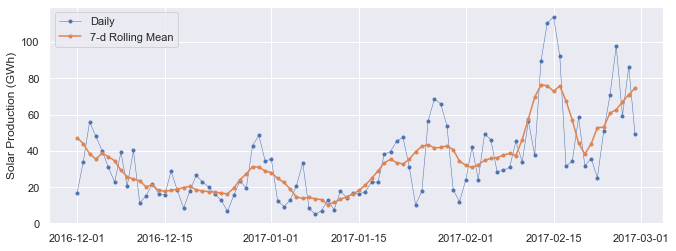

In [20]:
# Showing rolling average
start, end = '2016-12', '2017-02'


fig, ax = plt.subplots()

# Plot daily
ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

# 7-day rolling mean time series together
ax.plot(data_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [21]:
## Long range trend
data_365d = data[data_columns].rolling(window=365, center=True, min_periods=300).mean()

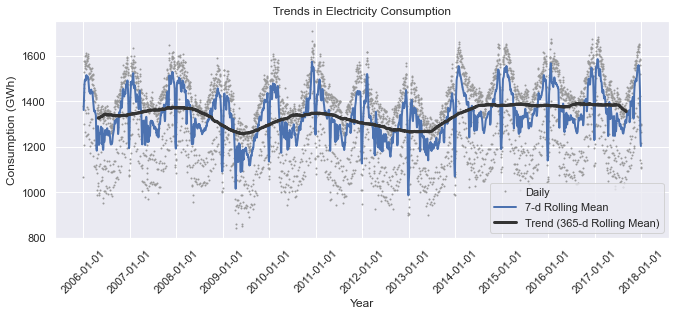

In [22]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series

fig, ax = plt.subplots()
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(data_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

ax.plot(data_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
plt.xticks(rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

## With COVID data

In [23]:
## Local data cache if latest does not work
#datadir = '../common-data/covid/'
#datafile = datadir + "data.csv"

In [24]:
## Read data from local file
#data = pd.read_csv(datafile, parse_dates=['date'], index_col='date')
#data.head()

In [25]:
# We can also try the latest data from NYT
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
# Read data from local file
data_latest = pd.read_csv(url, parse_dates=['date'], index_col='date')
data_latest.tail()

,county,state,fips,cases,deaths
date,,,,,
2021-02-21,Sweetwater,Wyoming,56037.0,3660,34.0
2021-02-21,Teton,Wyoming,56039.0,3326,9.0
2021-02-21,Uinta,Wyoming,56041.0,2027,12.0
2021-02-21,Washakie,Wyoming,56043.0,876,26.0
2021-02-21,Weston,Wyoming,56045.0,619,5.0


In [26]:
# Finding the information in a state
data_sc = data_latest[(data_latest['state']=='South Carolina') & (data_latest['county']=='Richland')]

In [27]:
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2020-03-17 to 2021-02-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  342 non-null    object 
 1   state   342 non-null    object 
 2   fips    342 non-null    float64
 3   cases   342 non-null    int64  
 4   deaths  342 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.0+ KB


In [28]:

# Shift moves data by given number of elements below - here 1 days
data_sc['reported_cases'] = data_sc['cases'] - data_sc['cases'].shift(1)
data_sc['reported_deaths'] = data_sc['deaths'] - data_sc['deaths'].shift(1) 

<ipython-input-28-95e1bbd36f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sc['reported_cases'] = data_sc['cases'] - data_sc['cases'].shift(1)
<ipython-input-28-95e1bbd36f2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sc['reported_deaths'] = data_sc['deaths'] - data_sc['deaths'].shift(1)


In [29]:
# Stats at the beginning
data_sc.head()

,county,state,fips,cases,deaths,reported_cases,reported_deaths
date,,,,,,,
2020-03-17,Richland,South Carolina,45079.0,1,0.0,NaN,NaN
2020-03-18,Richland,South Carolina,45079.0,4,0.0,3.0,0.0
2020-03-19,Richland,South Carolina,45079.0,8,0.0,4.0,0.0
2020-03-20,Richland,South Carolina,45079.0,22,0.0,14.0,0.0
2020-03-21,Richland,South Carolina,45079.0,28,0.0,6.0,0.0


In [30]:
# Stats at the beginning
data_sc.tail()

,county,state,fips,cases,deaths,reported_cases,reported_deaths
date,,,,,,,
2021-02-17,Richland,South Carolina,45079.0,39235,476.0,138.0,3.0
2021-02-18,Richland,South Carolina,45079.0,39434,477.0,199.0,1.0
2021-02-19,Richland,South Carolina,45079.0,39694,481.0,260.0,4.0
2021-02-20,Richland,South Carolina,45079.0,40046,481.0,352.0,0.0
2021-02-21,Richland,South Carolina,45079.0,40371,488.0,325.0,7.0


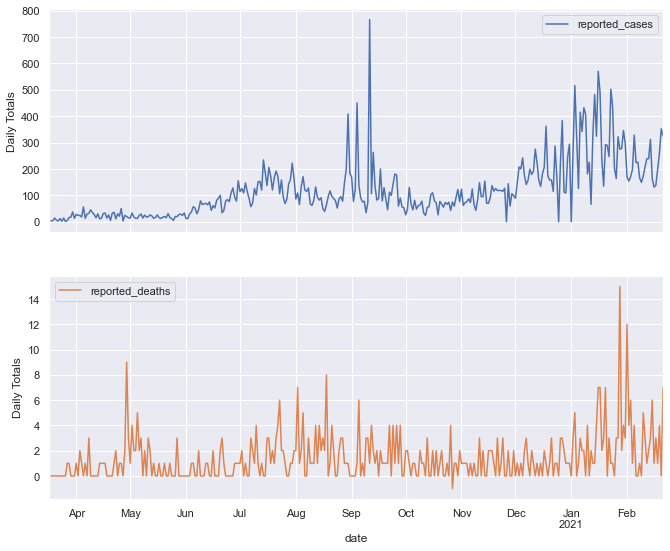

In [31]:
# Multiple information
cols_plot = ['reported_cases', 'reported_deaths']
axes = data_sc[cols_plot].plot(figsize=(11, 9), subplots=True)
#axes = data_sc[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

In [32]:
data_columns = ['reported_cases', 'reported_deaths']
data_7d = data_sc[data_columns].rolling(7, center=True).mean()
data_7d.head(15)

,reported_cases,reported_deaths
date,,
2020-03-17,NaN,NaN
2020-03-18,NaN,NaN
2020-03-19,NaN,NaN
2020-03-20,NaN,NaN
2020-03-21,6.285714,0.000000
2020-03-22,7.857143,0.000000
2020-03-23,7.428571,0.000000
2020-03-24,6.142857,0.142857
2020-03-25,7.571429,0.285714


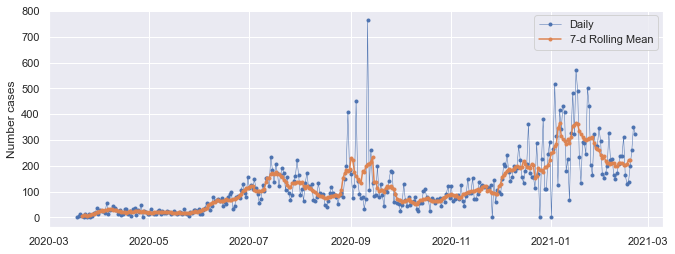

In [33]:
# Showing rolling average

fig, ax = plt.subplots()

# Plot daily
ax.plot(data_sc['reported_cases'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

# 7-day rolling mean time series together
ax.plot(data_7d['reported_cases'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Number cases')
ax.legend();

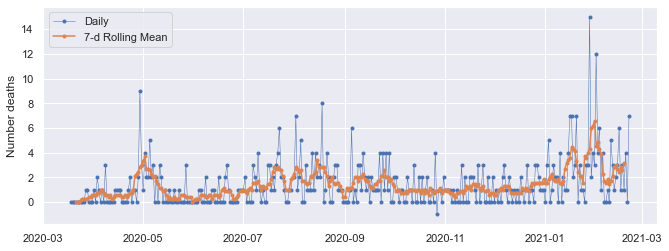

In [34]:
# Showing rolling average for SC richland

fig, ax = plt.subplots()

# Plot daily
ax.plot(data_sc['reported_deaths'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

# 7-day rolling mean time series together
ax.plot(data_7d['reported_deaths'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Number deaths')
ax.legend();